In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Создаем пути к директориям и файлам:

TRAIN_DATASET_PATH = 'train.csv'

TEST_DATASET_PATH = 'test.csv'
TEST_DATASET_EXT_PATH = 'ERazdumina_submission.csv'

In [4]:
# Загружаем датасет: 

df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [5]:
df.dtypes

Id                       int64
age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
mean_exam_points       float64
choose                   int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8009,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9748,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.4400,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.7243,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3706,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1215,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1172,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0591,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0277,0.164120,0.0,0.00,0.0,0.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3bda80f50>,
      dtype=object)

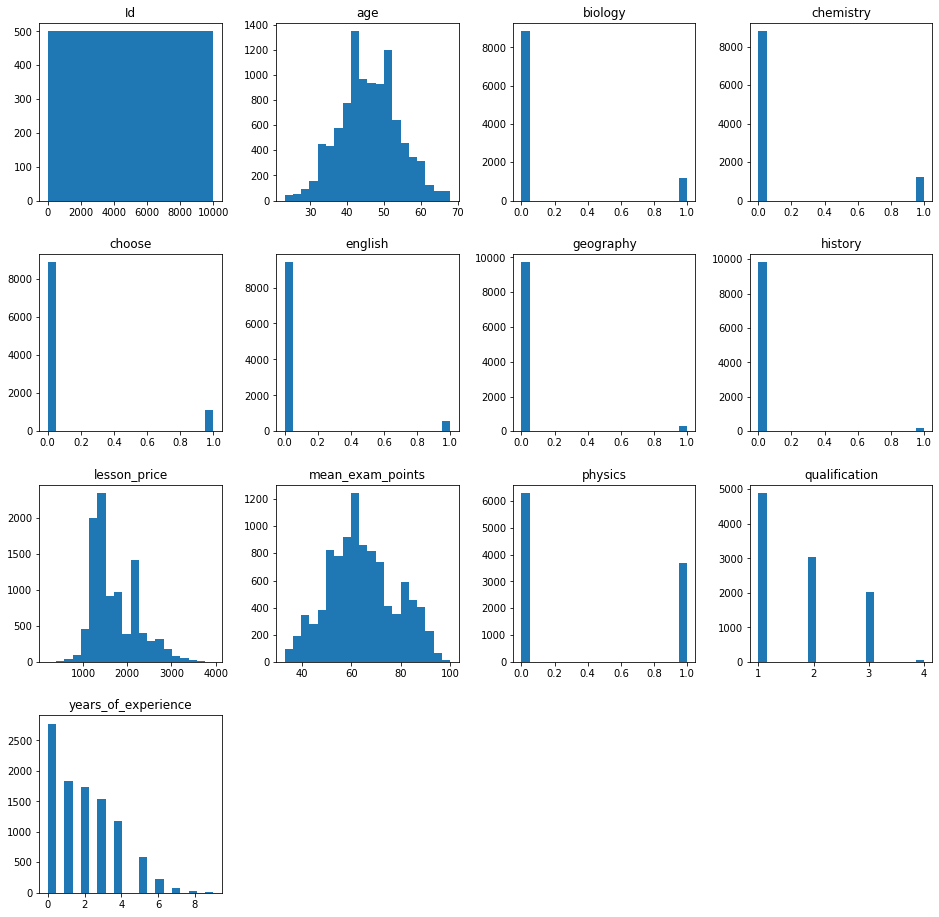

In [7]:
# Посмотрим распределение количественных признаков:

df.hist(figsize=(16,16), bins=20, grid=False)

In [8]:
# Посмотрим матрицу корреляции 
# Видно, что оценки за экзамен, квалификация и цена за урок имеют высокую степень корреляции 

df.corr()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,1.000000,0.009945,0.001222,0.003416,0.009471,-0.000809,0.001553,0.003229,0.012587,-0.006159,0.006443,0.006987,0.012043
age,0.009945,1.000000,0.072635,0.000691,-0.007778,0.004148,0.003808,-0.031889,0.002676,-0.005452,0.009258,0.004141,0.017165
years_of_experience,0.001222,0.072635,1.000000,0.253459,0.200629,0.017976,-0.004051,0.001326,0.011975,0.002063,-0.005732,0.208089,0.029010
lesson_price,0.003416,0.000691,0.253459,1.000000,0.797383,0.011092,-0.002405,0.017089,-0.001127,0.012825,0.000303,0.729215,-0.134013
qualification,0.009471,-0.007778,0.200629,0.797383,1.000000,0.010561,-0.002692,0.014836,-0.001094,0.014775,-0.003177,0.763883,0.042160
physics,-0.000809,0.004148,0.017976,0.011092,0.010561,1.000000,0.004893,-0.007302,-0.005290,-0.015968,0.000455,0.186124,0.195183
chemistry,0.001553,0.003808,-0.004051,-0.002405,-0.002692,0.004893,1.000000,0.012943,-0.008835,0.004373,0.009508,0.029816,0.091878
biology,0.003229,-0.031889,0.001326,0.017089,0.014836,-0.007302,0.012943,1.000000,0.000969,-0.010352,-0.011916,0.039631,0.071310
english,0.012587,0.002676,0.011975,-0.001127,-0.001094,-0.005290,-0.008835,0.000969,1.000000,0.014546,-0.008414,0.006170,0.022227
geography,-0.006159,-0.005452,0.002063,0.012825,0.014775,-0.015968,0.004373,-0.010352,0.014546,1.000000,-0.004519,0.026600,0.006366


In [9]:
# Проверим есть ли пропущенные значения

df.shape

(10000, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [11]:
# Отберем признаки и сделаем учебную и валидационную выборки 

In [5]:
df.columns

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points', 'choose'],
      dtype='object')

In [5]:
feature_names = ['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points']
target_name = ['choose']

In [6]:
X_train_full = df[feature_names]
y_train_full = df[target_name]

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [16]:
# Для сравнения попробуем построить линейную модель и случайный лес

In [17]:
def calc_std_feat(X):
    
    X_transformed = X.copy()
    X_mean, X_std = X_transformed.mean(axis=1), X_transformed.std(axis=1)
    X_mean, X_std = X_mean.reshape(X_transformed.shape[0], 1), X_std.reshape(X_transformed.shape[0], 1)
    
    X_transformed = (X_transformed - X_mean) / X_std
    
    return X_transformed

In [18]:
def sigmoid(z):    
    res = 1 / (1 + np.exp(-z))
    return res

In [19]:
def calc_logloss(y, y_pred):
    tol = 1e-5
    y_pred = y_pred.copy()
    y_pred = np.clip(y_pred, a_min = tol, a_max = 1 - tol)
     
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [20]:
def eval_model(X, y, iterations, alpha=1e-4, tol=1e-5):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T))
        errors.append(err)
        

        if i > 2 and np.abs(err - errors[-2])<tol: 
            break
            
    return W

In [21]:
def predict(W, X, trash: float = 0.5):
    
    m = X.shape[1]
    
    y_pred = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(W.T, X))
    
    y_pred = np.where(A > trash, 1, 0)
    
    return y_pred

In [8]:
def accuracy (y, y_pred):
    score = 100.0 - np.mean(np.abs(y_pred-y)*100.0)

    return score

In [23]:
X_train_tr = calc_std_feat(X_train.values.transpose())
y_train_tr = y_train.values.reshape(1, y_train.shape[0])
X_valid_tr = calc_std_feat(X_valid.values.transpose())
y_valid_tr = y_valid.values.reshape(1, y_valid.shape[0])

In [24]:
learning_rate = 0.1
n_iterations = 10000

W = eval_model(X_train_tr, y_train_tr, iterations=n_iterations, alpha=learning_rate)

In [25]:
y_predicted_train = predict(W, X_train_tr)
y_predicted_valid = predict(W, X_valid_tr)

In [26]:
train_accuracy = accuracy (y_train_tr, y_predicted_train)
valid_accuracy = accuracy (y_valid_tr, y_predicted_valid) 

In [27]:
print(f"Точность на обучающей выборке: {train_accuracy}")
print(f"Точность на валидационной выборке: {valid_accuracy}")

Точность на обучающей выборке: 61.65714285714286
Точность на валидационной выборке: 61.13333333333333


In [9]:
# теперь построим случайный лес и сравним алгоритмы

In [10]:
random.seed(42)

def get_bootstrap(labels, N):
    return np.random.randint(0, len(labels), size=(N, len(labels)))

In [11]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [12]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
                

In [13]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        
    

In [14]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    
    classes = {}
    
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity


In [15]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [16]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [17]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 1

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [18]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [19]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap_idx = get_bootstrap(labels, n_trees)
    
    for idx in bootstrap_idx: 
        b_data, b_labels = data[idx], labels[idx]
        forest.append(build_tree(b_data, b_labels))
    
    return forest

In [20]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [21]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [22]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [23]:
n_trees_list = [5, 10, 20]

In [30]:
train_data = X_train.values
train_labels = y_train.values

valid_data = X_valid.values
valid_labels = y_valid.values

In [31]:
for n in n_trees_list:
    n_trees = n
    my_forest = random_forest(train_data, train_labels, n_trees)
    
    # Получим ответы для обучающей выборки 
    train_answers = tree_vote(my_forest, train_data)
    
    # И получим ответы для валидационной выборки
    valid_answers = tree_vote(my_forest, valid_data)
     # Точность на обучающей выборке
    train_accuracy = accuracy(train_labels, train_answers)
 
    # Точность на валидационной выборке
    valid_accuracy = accuracy(valid_labels, valid_answers)
   
    print(f"Лес из {n}-деревьев")

    print(f"Точность на обучающей выборке: {train_accuracy}")
    print(f"Точность на валидационной выборке: {valid_accuracy}")

TypeError: unhashable type: 'numpy.ndarray'

(numpy.ndarray, (7000, 12))